In [69]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [70]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [71]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [72]:
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [73]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [74]:
#pd.isnull(data).sum
#data.isnull().any().any()
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [75]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [76]:
data.size

70000

In [77]:
data.shape

(5000, 14)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [79]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [80]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [81]:
data[data['Experience'] < 0]['Experience'].count()

52

In [82]:
data[data['Experience'] < 0]['Experience']

89     -1
226    -1
315    -2
451    -2
524    -1
536    -1
540    -1
576    -1
583    -1
597    -2
649    -1
670    -1
686    -1
793    -2
889    -2
909    -1
1173   -1
1428   -1
1522   -1
1905   -1
2102   -1
2430   -1
2466   -2
2545   -1
2618   -3
2717   -2
2848   -1
2876   -2
2962   -2
2980   -1
3076   -1
3130   -2
3157   -1
3279   -1
3284   -1
3292   -1
3394   -1
3425   -1
3626   -3
3796   -2
3824   -1
3887   -2
3946   -1
4015   -1
4088   -1
4116   -2
4285   -3
4411   -2
4481   -2
4514   -3
4582   -1
4957   -1
Name: Experience, dtype: int64

In [83]:
data['Experience'] =  data["Experience"].abs()

In [84]:
data[data['Experience'] < 0]['Experience'].count()

0

In [85]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [86]:
data.groupby(["Personal Loan"]).count()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [87]:
data0= data.groupby('Personal Loan')
data0 = data0.get_group(0)
data0.shape


(4520, 14)

In [88]:
data0.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,4520.0,2512.165487,1448.299331,1.0,1259.75,2518.5,3768.25,5000.0
Age,4520.0,45.367257,11.450427,23.0,35.00,45.0,55.00,67.0
Experience,4520.0,20.165487,11.398146,0.0,10.00,20.0,30.00,43.0
Income,4520.0,66.237389,40.578534,8.0,35.00,59.0,84.00,224.0
ZIP Code,4520.0,93152.428761,2156.949654,9307.0,91911.00,93437.0,94608.00,96651.0
Family,4520.0,2.373451,1.148771,1.0,1.00,2.0,3.00,4.0
CCAvg,4520.0,1.729009,1.567647,0.0,0.60,1.4,2.30,8.8
Education,4520.0,1.843584,0.839975,1.0,1.00,2.0,3.00,3.0
Mortgage,4520.0,51.789381,92.038931,0.0,0.00,0.0,98.00,635.0
Personal Loan,4520.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [89]:
data1= data.groupby('Personal Loan')
data1 = data1.get_group(1)
data1.shape

(480, 14)

In [90]:
data1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,480.0,2390.650000,1394.393674,10.0,1166.50,2342.0,3566.0000,4981.0
Age,480.0,45.066667,11.590964,26.0,35.00,45.0,55.0000,65.0
Experience,480.0,19.843750,11.582443,0.0,9.00,20.0,30.0000,41.0
Income,480.0,144.745833,31.584429,60.0,122.00,142.5,172.0000,203.0
ZIP Code,480.0,93153.202083,1759.223753,90016.0,91908.75,93407.0,94705.5000,96008.0
Family,480.0,2.612500,1.115393,1.0,2.00,3.0,4.0000,4.0
CCAvg,480.0,3.905354,2.097681,0.0,2.60,3.8,5.3475,10.0
Education,480.0,2.233333,0.753373,1.0,2.00,2.0,3.0000,3.0
Mortgage,480.0,100.845833,160.847862,0.0,0.00,0.0,192.5000,617.0
Personal Loan,480.0,1.000000,0.000000,1.0,1.00,1.0,1.0000,1.0


<Axes: xlabel='Education', ylabel='Income'>

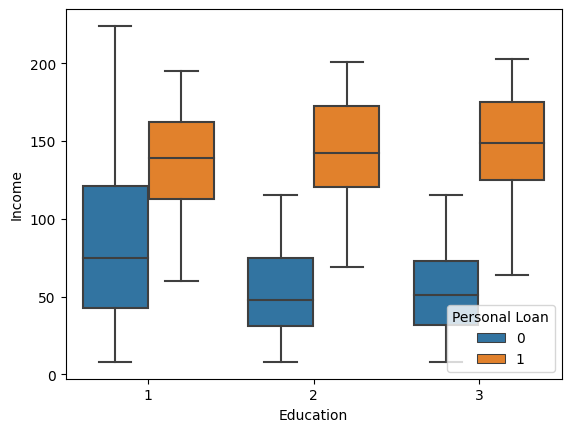

In [91]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data)

<Axes: xlabel='Education', ylabel='Mortgage'>

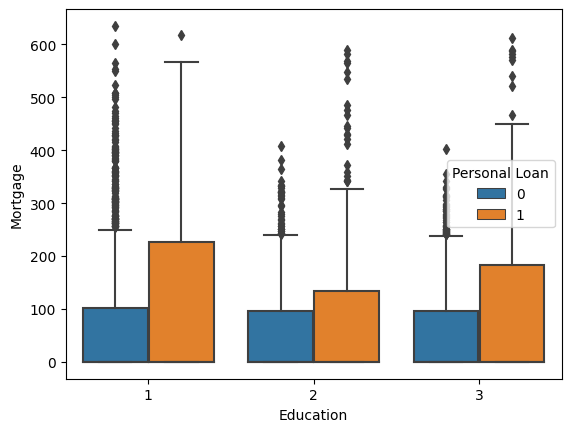

In [92]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=data)

<Axes: xlabel='Securities Account', ylabel='count'>

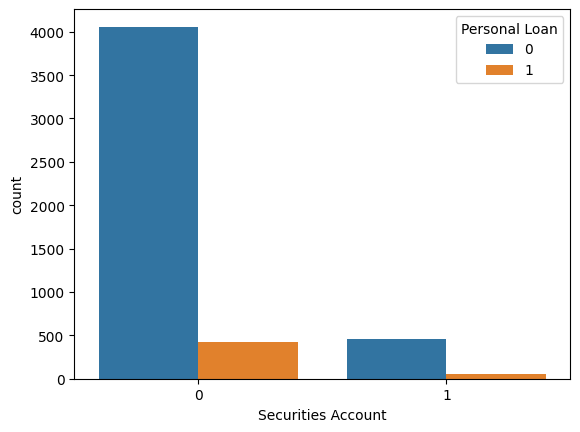

In [93]:
sns.countplot(x="Securities Account", hue="Personal Loan", data=data)


<Axes: xlabel='Family', ylabel='count'>

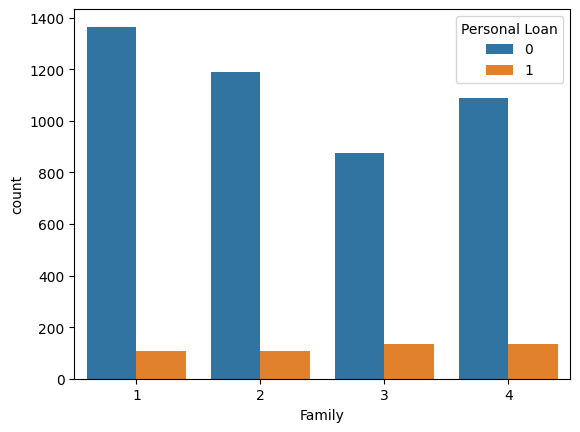

In [94]:
sns.countplot(x="Family", hue="Personal Loan", data=data)


<Axes: xlabel='CD Account', ylabel='count'>

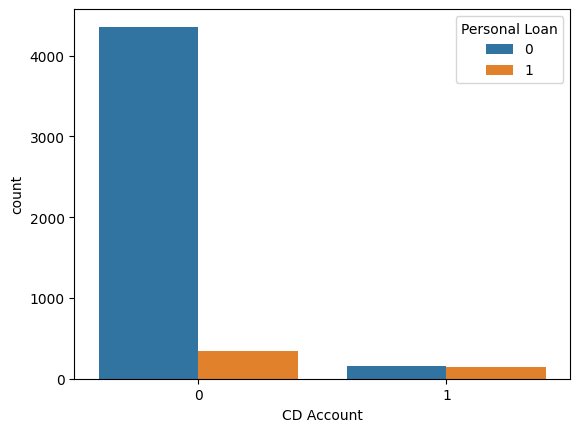

In [95]:
sns.countplot(x="CD Account", hue="Personal Loan", data=data)


<Axes: xlabel='CCAvg', ylabel='count'>

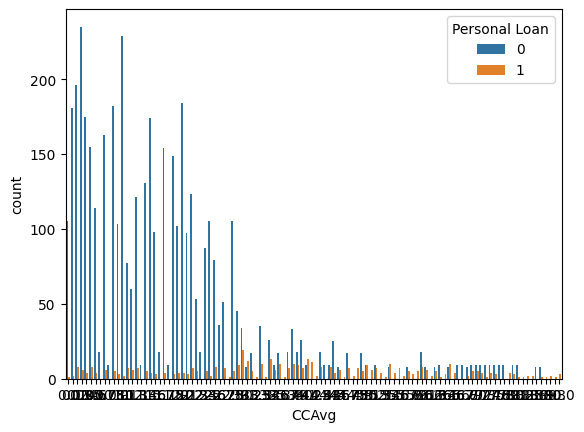

In [96]:
sns.countplot(x="CCAvg", hue="Personal Loan", data=data)

/tmp/ipykernel_377271/2868701069.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data0['CCAvg'],color='r')
/tmp/ipykernel_377271/2868701069.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['CCAvg'],color='g')


<Axes: xlabel='CCAvg', ylabel='Density'>

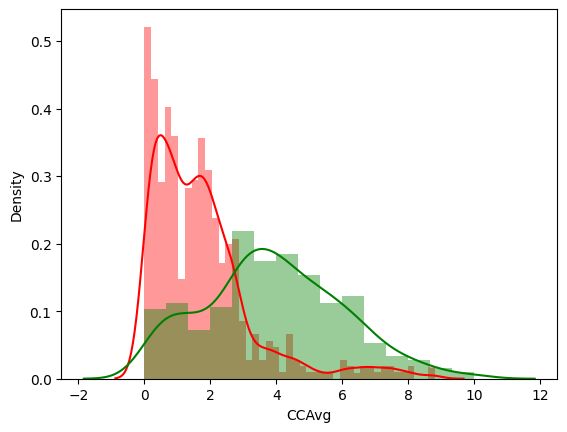

In [97]:
sns.distplot(data0['CCAvg'],color='r')
sns.distplot(data1['CCAvg'],color='g')

<Axes: xlabel='CCAvg', ylabel='Count'>

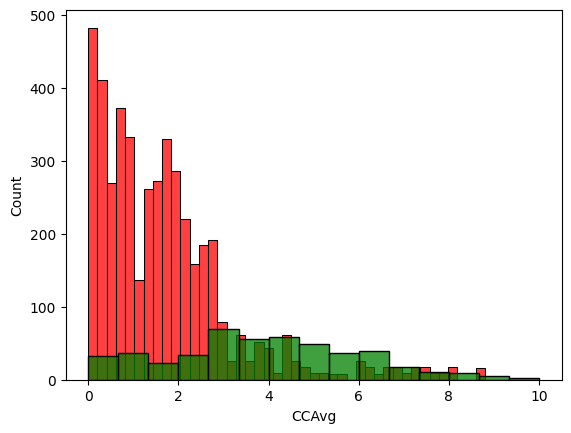

In [98]:
sns.histplot(data0['CCAvg'],color='r')
sns.histplot(data1['CCAvg'],color='g')

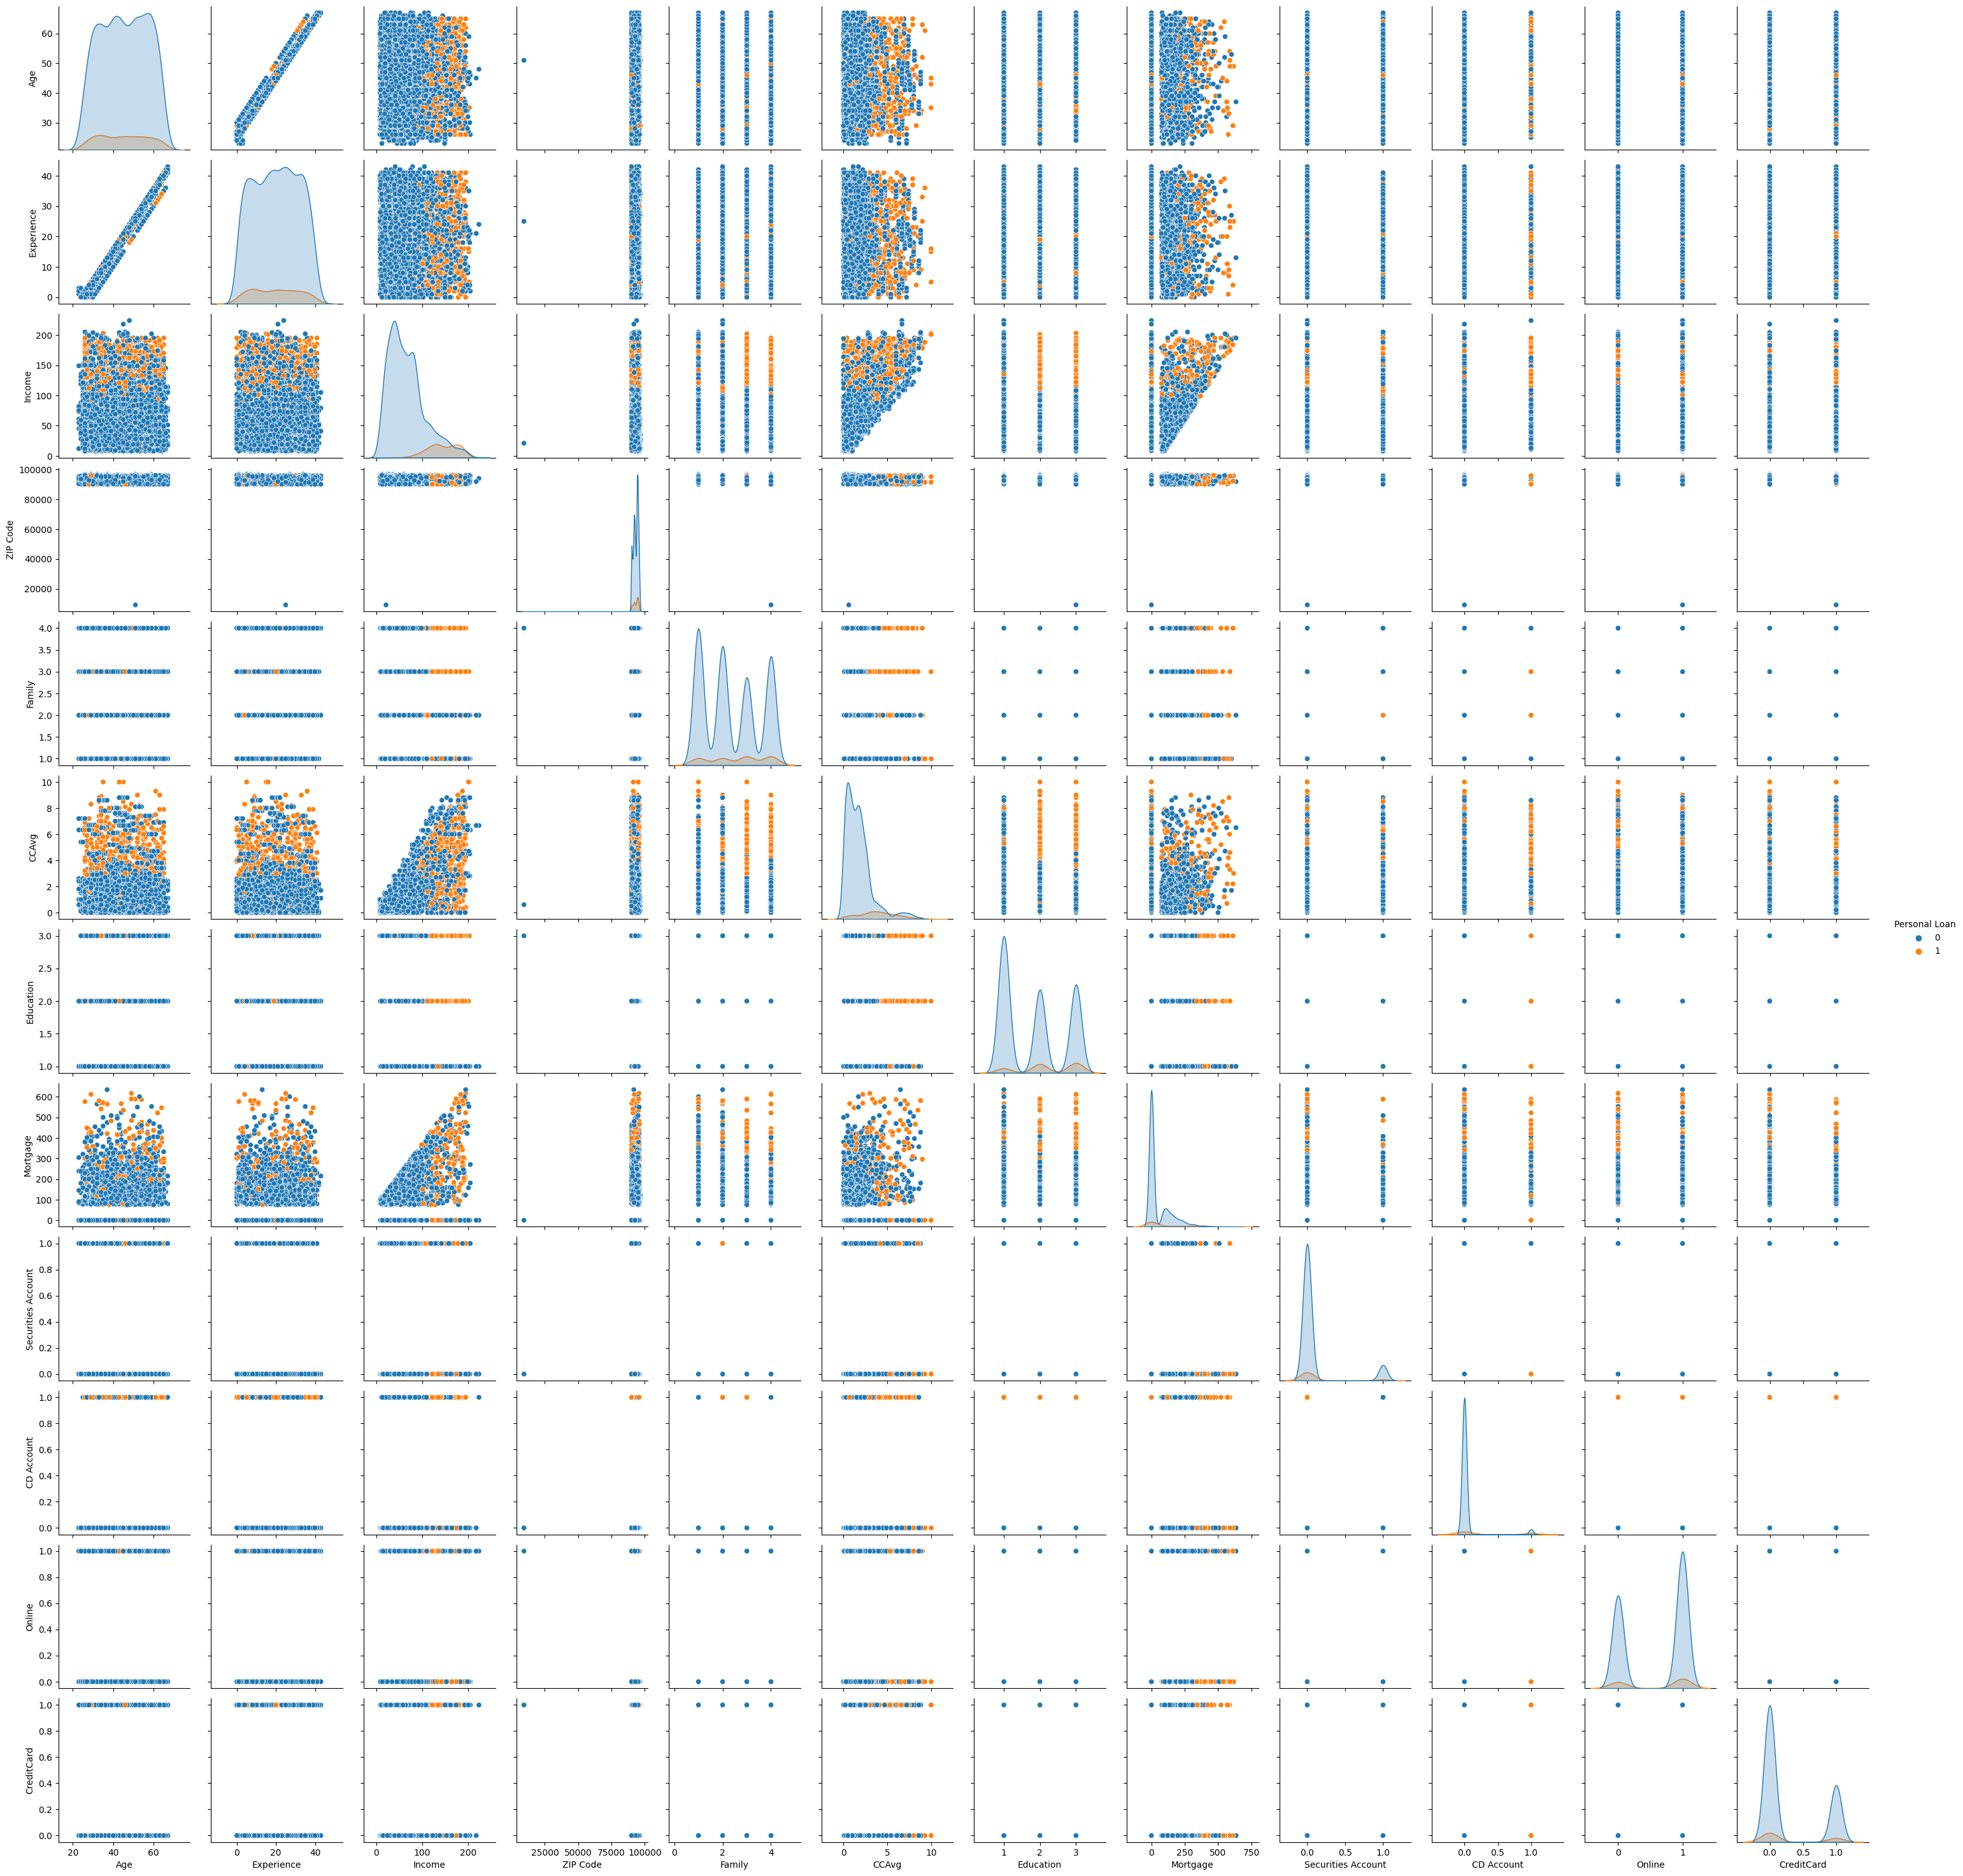

In [99]:
sns.pairplot(data.iloc[:,1:], hue='Personal Loan')

In [100]:
corr = data.corr()
corr

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008202,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.993991,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008202,0.993991,1.000000,-0.046876,-0.028936,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.017695,-0.055269,-0.046876,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028936,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.051851,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049738,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013919,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.011097,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.008304,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


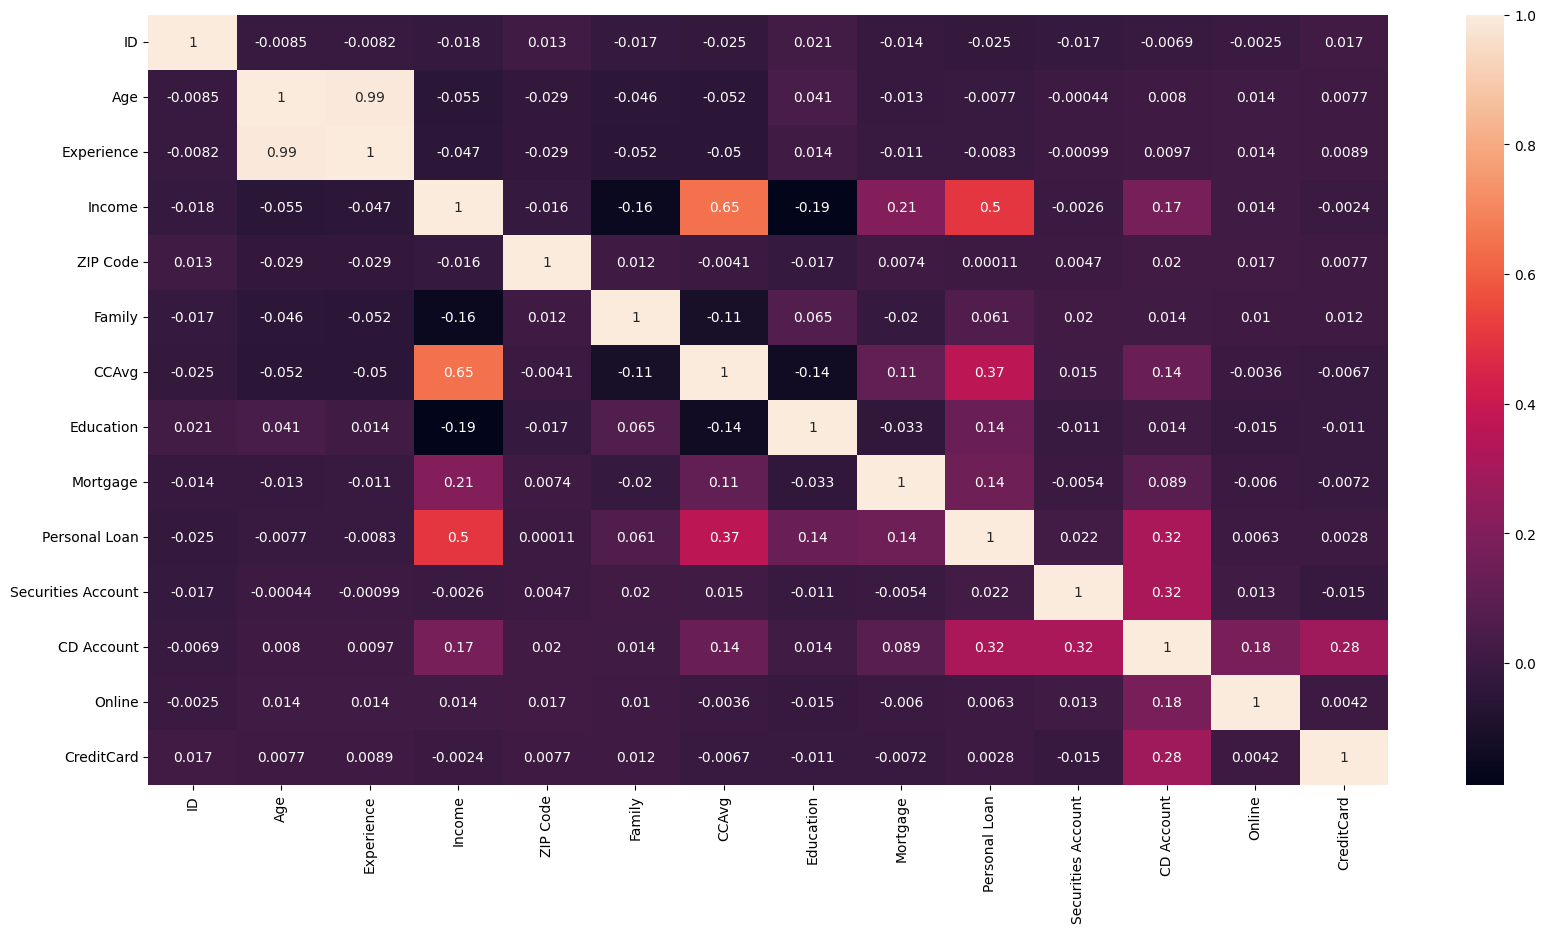

In [101]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)
plt.show()

In [102]:
data.dtypes


ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [103]:
from sklearn.model_selection import train_test_split # # Import Sklearn package's data splitting function
from sklearn import metrics

X = data.drop(['ID','Personal Loan'], axis=1)
y = data['Personal Loan']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [105]:
from sklearn.linear_model import LogisticRegression # Import Logistic Regression machine learning library
log_model1 = LogisticRegression()

In [106]:
# Apply training data to the logistic regression model
log_model1.fit(X_train, y_train)

#Predict the test results
y_predict = log_model1.predict(X_test)

In [108]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, log_model1.coef_[0][idx]))

The coefficient for Age is -0.00021394244303187207
The coefficient for Experience is -0.00021216504162911248
The coefficient for Income is 0.03781489475883203
The coefficient for ZIP Code is -6.647930872551077e-05
The coefficient for Family is 0.000157577007494404
The coefficient for CCAvg is 0.001077177960427252
The coefficient for Education is 0.00026062512690741823
The coefficient for Mortgage is 0.0005632997209025646
The coefficient for Securities Account is 2.4415754243381895e-05
The coefficient for CD Account is 0.00013712325330404496
The coefficient for Online is -4.25084528263378e-06
The coefficient for CreditCard is 1.2749408492083126e-06


In [110]:
# Let us check the intercept for the model

intercept = log_model1.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.042684198434524e-06


In [111]:
# Calculate the model score and print confusion matrix

log_model1_score = log_model1.score(X_test, y_test)
print("The Logistic Regression model accuracy is {}".format(log_model1_score))

The Logistic Regression model accuracy is 0.9013333333333333


In [112]:
print("The confustion matrix for Logistic Regression is")
print(metrics.confusion_matrix(y_test, y_predict))

The confustion matrix for Logistic Regression is
[[1305   55]
 [  93   47]]


In [113]:
## To have an accurate score, let us create another set of data with scaling function applied to it.

from sklearn import preprocessing

ZX = preprocessing.scale(X)
ZX_train, ZX_test, y_train, y_test = train_test_split(ZX, y, test_size=0.3, random_state=10)

In [114]:
# Apply Scaled training data to the logistic regression model
log_model2 = LogisticRegression()
log_model2.fit(ZX_train, y_train)

#Predict the test results
y_predict1 = log_model2.predict(ZX_test)

In [115]:
# Let us explore the coefficients for each of the independent attributes

coef_df = pd.DataFrame(log_model2.coef_)
print(coef_df)

        0         1         2        3         4         5         6    
0 -0.08905  0.186949  2.521642 -0.02902  0.786484  0.188765  1.394703  \

         7         8         9         10        11  
0  0.001291 -0.216822  0.868342 -0.373185 -0.489386  


In [116]:
# Let us check the intercept for the model

intercept1 = log_model2.intercept_[0]

print("The intercept for Logistic Regression model is {}".format(intercept1))

The intercept for Logistic Regression model is -4.615812449700931


In [117]:
# Calculate the model score

log_model2_score = log_model2.score(ZX_test, y_test)
print("The Logistic Regression model accuracy with scaled data is {}".format(log_model2_score))

The Logistic Regression model accuracy with scaled data is 0.9526666666666667


In [118]:
# Print confusion matrix

print("The confustion matrix for Logistic Regression with scaled data is")
print(metrics.confusion_matrix(y_test, y_predict1))

The confustion matrix for Logistic Regression with scaled data is
[[1339   21]
 [  50   90]]


In [119]:
from sklearn.linear_model import LinearRegression # Import Linear Regression machine learning library
linear_model1 = LinearRegression()
linear_model1.fit(X_train, y_train)
y_predict_linear = linear_model1.predict(X_test)
coef_df = pd.DataFrame(linear_model1.coef_)
print(coef_df)

linear_model1_score = linear_model1.score(X_test, y_test)
print("The Linear Regression model accuracy is {}".format(linear_model1_score))

               0
0  -4.163771e-03
1   4.650635e-03
2   3.124704e-03
3   1.630496e-07
4   3.170568e-02
5   1.030294e-02
6   8.095299e-02
7   6.657144e-05
8  -5.511822e-02
9   3.326123e-01
10 -2.922510e-02
11 -5.023215e-02
The Linear Regression model accuracy is 0.36115707605798275


In [121]:
linear_model2 = LinearRegression()
linear_model2.fit(ZX_train, y_train)
y_predict1_linear = linear_model2.predict(X_test)
coef_df = pd.DataFrame(linear_model2.coef_)
print(coef_df)

linear_model2_score = linear_model2.score(ZX_test, y_test)
print("The Linear Regression model accuracy with scaled data is {}".format(linear_model2_score))

           0
0  -0.047725
1   0.053083
2   0.143827
3   0.000346
4   0.036384
5   0.018004
6   0.067983
7   0.006771
8  -0.016854
9   0.079237
10 -0.014336
11 -0.022885
The Linear Regression model accuracy with scaled data is 0.36115707605798264


/home/siddhant/miniconda3/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [122]:
from sklearn.naive_bayes import GaussianNB

naive_model1 = GaussianNB()
naive_model1.fit(X_train,y_train)
y_predict_naive = naive_model1.predict(X_test)

In [123]:
naive_model1_score = naive_model1.score(X_test, y_test)
print("The Naive Bayes model accuracy is {}".format(naive_model1_score))

The Naive Bayes model accuracy is 0.8853333333333333


In [124]:
print(metrics.confusion_matrix(y_test, y_predict_naive))


[[1242  118]
 [  54   86]]


In [125]:
naive_model2 = GaussianNB()
naive_model2.fit(ZX_train,y_train)
y_predict1_naive = naive_model2.predict(ZX_test)
naive_model2_score = naive_model2.score(ZX_test, y_test)
print("The Naive Bayes model accuracy is {}".format(naive_model2_score))
print(metrics.confusion_matrix(y_test, y_predict1_naive))

The Naive Bayes model accuracy is 0.8786666666666667
[[1234  126]
 [  56   84]]


In [126]:
from sklearn.neighbors import KNeighborsClassifier

knn_model1= KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
knn_model1.fit(X_train, y_train)
y_pred_knn = knn_model1.predict(X_test)
knn_model1_score = knn_model1.score(X_test, y_test)
print("The KNN model accuracy is {}".format(knn_model1_score))
print("The confusion matrix of KNN model is")
print(metrics.confusion_matrix(y_test,y_pred_knn))

The KNN model accuracy is 0.884
The confusion matrix of KNN model is
[[1285   75]
 [  99   41]]


In [127]:
knn_model2= KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
knn_model2.fit(ZX_train, y_train)
y_pred1_knn = knn_model2.predict(ZX_test)
knn_model2_score = knn_model2.score(ZX_test, y_test)
print("The KNN model accuracy with scaled data is {}".format(knn_model2_score))
print("The confusion matrix of KNN model is")
print(metrics.confusion_matrix(y_test,y_pred1_knn))

The KNN model accuracy with scaled data is 0.96
The confusion matrix of KNN model is
[[1349   11]
 [  49   91]]


In [128]:
print("Accuracy of models before scaling:")
print("Logistic Regression model: {}".format(log_model1_score))
print("Linear Regression model: {}".format(linear_model1_score))
print("Naive Bayes model: {}".format(naive_model1_score))
print("KNN model: {}".format(knn_model1_score))

Accuracy of models before scaling:
Logistic Regression model: 0.9013333333333333
Linear Regression model: 0.36115707605798275
Naive Bayes model: 0.8853333333333333
KNN model: 0.884


In [129]:
print("Accuracy of models with scaled dataset:")
print("Logistic Regression model: {}".format(log_model2_score))
print("Linear Regression model: {}".format(linear_model2_score))
print("Naive Bayes model: {}".format(naive_model2_score))
print("KNN model: {}".format(knn_model2_score))

Accuracy of models with scaled dataset:
Logistic Regression model: 0.9526666666666667
Linear Regression model: 0.36115707605798264
Naive Bayes model: 0.8786666666666667
KNN model: 0.96
